In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
import seaborn as sns

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
pwd

'/home/saikiran/Desktop'

In [12]:
Dataset = pd.read_csv(r"WineQT.csv")

In [13]:
Dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [14]:
Dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [15]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [16]:
Dataset.pop('Id')

0          0
1          1
2          2
3          3
4          4
        ... 
1138    1592
1139    1593
1140    1594
1141    1595
1142    1597
Name: Id, Length: 1143, dtype: int64

In [17]:
Dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
Y = Dataset['quality']
X = Dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [19]:
import warnings
warnings.filterwarnings('ignore')

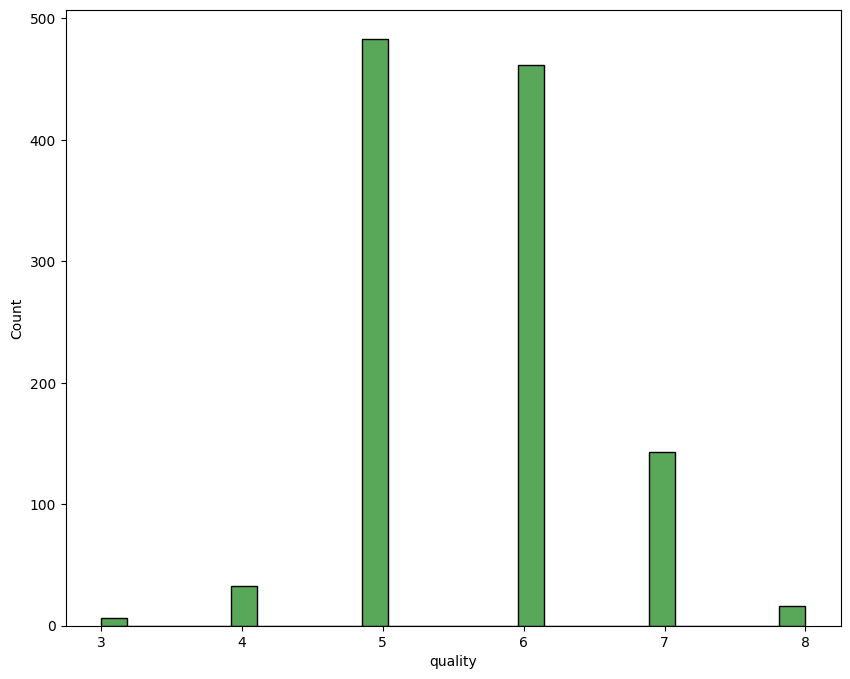

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(Dataset['quality'], color = 'forestgreen')
plt.show()

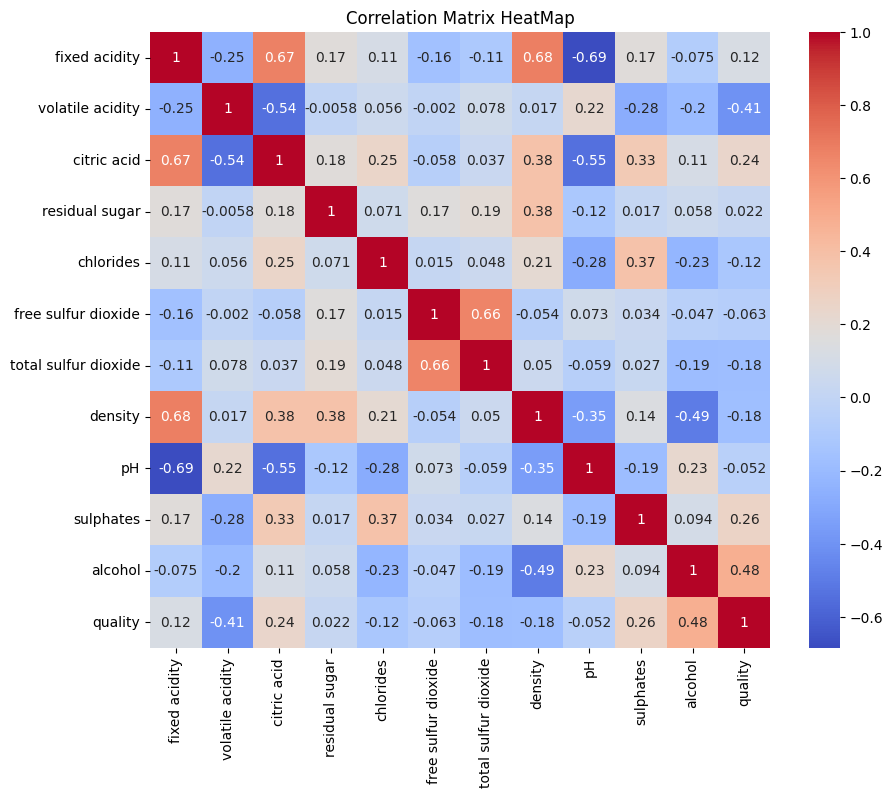

In [21]:
plt.figure(figsize=(10,8))
corr_matrix = Dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix HeatMap')
plt.show()

(array([105., 587., 298., 109.,  37.,   7.]),
 array([ 4.6       ,  6.48333333,  8.36666667, 10.25      , 12.13333333,
        14.01666667, 15.9       ]),
 <BarContainer object of 6 artists>)

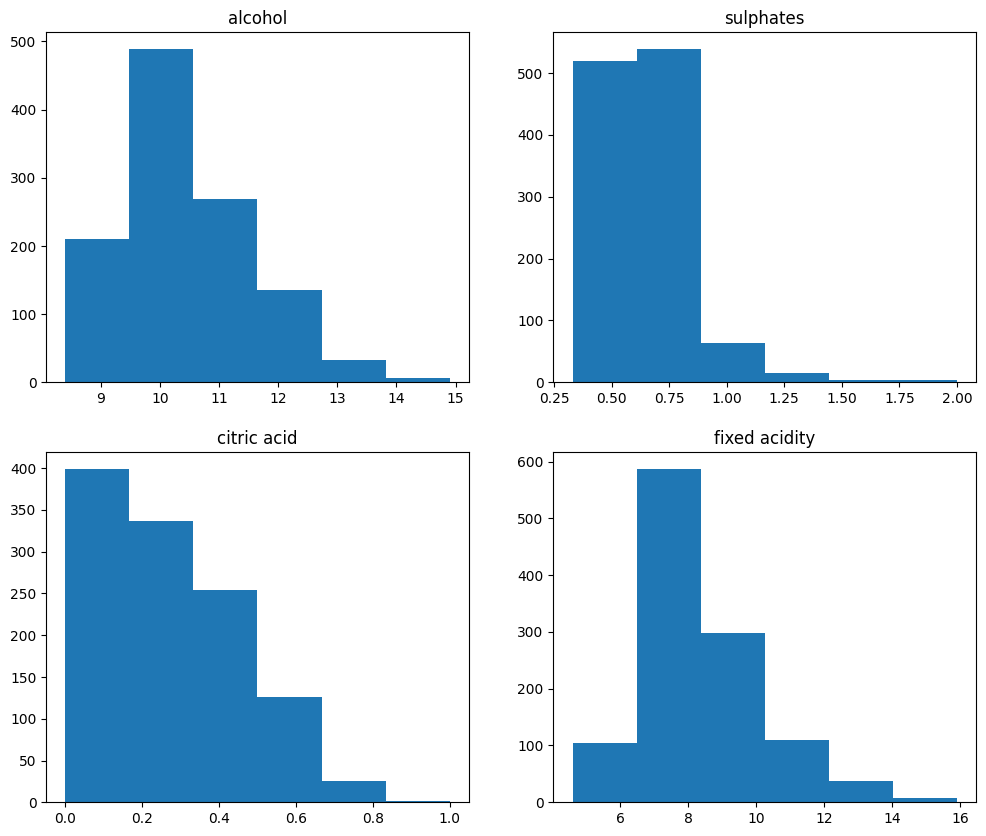

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes[0,0].set_title("alcohol")
axes[0,0].hist(Dataset['alcohol'], bins=6)
axes[0,1].set_title("sulphates")
axes[0,1].hist(Dataset['sulphates'], bins=6)
axes[1,0].set_title("citric acid")
axes[1,0].hist(Dataset['citric acid'], bins=6)
axes[1,1].set_title("fixed acidity")
axes[1,1].hist(Dataset['fixed acidity'], bins=6)

In [23]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 1200x1000 with 0 Axes>

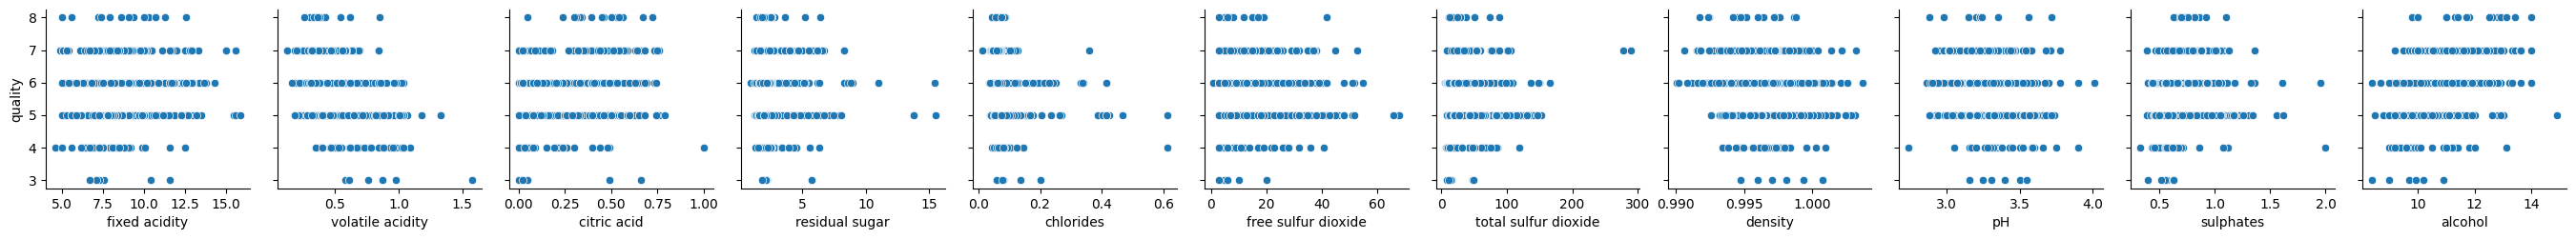

In [24]:
plt.figure(figsize=(12,10))
sns.pairplot(Dataset, x_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], y_vars = 'quality')
plt.show()

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=99)

In [29]:
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train)
X_test_scal = sc.fit_transform(X_test)

In [31]:
Wine_LRM = LinearRegression()

In [32]:
Wine_LRM.fit(X_train_scal, Y_train)

LinearRegression()

In [33]:
Wine_LRM.coef_

array([ 0.06607153, -0.19998339,  0.00630248,  0.01996646, -0.07074485,
        0.02017893, -0.08532459, -0.05925782, -0.02934822,  0.14867259,
        0.28775949])

In [34]:
pd.DataFrame(Wine_LRM.coef_, index=X.columns, columns=['mycoef'])

,mycoef
fixed acidity,0.066072
volatile acidity,-0.199983
citric acid,0.006302
residual sugar,0.019966
chlorides,-0.070745
free sulfur dioxide,0.020179
total sulfur dioxide,-0.085325
density,-0.059258
pH,-0.029348
sulphates,0.148673


In [35]:
Predict = Wine_LRM.predict(X_test_scal)

In [36]:
print("The Regression score is : ",r2_score(Y_test, Predict))

The Regression score is :  0.3354753978291358


In [37]:
print("The Mean Absolute Error is : ",mean_absolute_error(Y_test, Predict))

The Mean Absolute Error is :  0.5120812860889505


In [38]:
print("The Mean Square Error is : ",mean_squared_error(Y_test, Predict))

The Mean Square Error is :  0.43122313098290477


In [39]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [40]:
X_new_data = X_test_scal
Wine_LRM.predict(X_new_data)

array([5.37177369, 5.77158798, 5.27055528, 5.188335  , 5.30272477,
       5.17765198, 6.22081801, 6.21661605, 5.07538907, 5.52121463,
       4.84408727, 4.99434517, 5.58422963, 5.31367212, 5.00692822,
       5.23246739, 5.05453533, 5.54111569, 5.72293994, 6.2375545 ,
       6.97548488, 6.21661605, 6.13224476, 5.50755004, 5.96732765,
       6.4794427 , 5.18488916, 5.80715866, 5.17506917, 5.54848298,
       5.05669156, 5.20770019, 5.37058608, 5.16624235, 6.26053228,
       5.04662229, 6.48389391, 5.98707272, 5.97945357, 4.96105448,
       5.73449583, 5.17958392, 5.43111983, 5.91265756, 5.04932298,
       5.64929612, 4.98394211, 4.94822001, 5.40341818, 6.04826583,
       5.94627106, 5.60590927, 5.58422963, 5.64824476, 4.71397536,
       6.16200269, 5.13174898, 5.32573704, 6.66589654, 5.41593872,
       5.07225021, 6.35078327, 5.32778   , 6.01909256, 5.13166051,
       5.09556764, 4.87851132, 5.57156244, 5.51692989, 5.88043306,
       5.44801292, 6.16791499, 5.03297711, 5.21742464, 5.45583